# Comparison of Observational Datasets from PTI <img src="https://www.python.org/static/community_logos/python-logo.png" alt="Python Logo" width="120" height="120">


In this notebook, we will compare observational datasets processed from the PTI project. The datasets are stored in the directory `/lustre/gmeteo/PTICLIMA/DATA/AUX/GRID_INTERCOMP`. The goal of this analysis is to examine the data, identify trends, and provide insights into the variability of climate parameters across different regions. This comparison will help us understand the differences in the data and assess their accuracy and consistency.


### Load libraries

Here we load the required libraries to execute the notebook.

In [1]:
import xarray as xr       
import pandas as pd        
import glob 
import os

from plot_functions import (
    plot_map,
    plot_time_series,
    plot_annual_cicle)


### Input Parameters

In [2]:
variable = 'tasmin'
models = ['E-OBS', 'AEMET', 'EMO', 'ERA5-Land']
#models = ['ERA5-Land']

root = '/lustre/gmeteo/PTICLIMA/DATA/AUX/GRID_INTERCOMP'

### Loading the Data

In this section, we will load the observational datasets from the PTI project.

In [3]:
# Initialize an empty list to store datasets
datasets = []

for model in models:
    print(model)
    file_pattern = f'{root}/{model}*/{variable}/*.nc'
    file_list = glob.glob(file_pattern)
    ds_model = xr.open_mfdataset(file_list, combine='by_coords', chunks={})
    ds_model = ds_model.drop_duplicates('time')
    ds_model = ds_model.assign_coords(model=model)
    if model == 'EMO':
        ds_model['tasmin'] = ds_model['tn']
    if model == "ERA5-Land":
        ds_model[variable] = ds_model[variable]/10
    datasets.append(ds_model)

E-OBS
AEMET
EMO
ERA5-Land


In [4]:
# Combine all models along the new 'model' dimension
ds = xr.concat(datasets, dim='model')

Create a directory to save the results for this particular  model

In [5]:
base_output_dir = 'results'
output_dir = f"{base_output_dir}"
os.makedirs(output_dir, exist_ok = True)

### Plot the maps

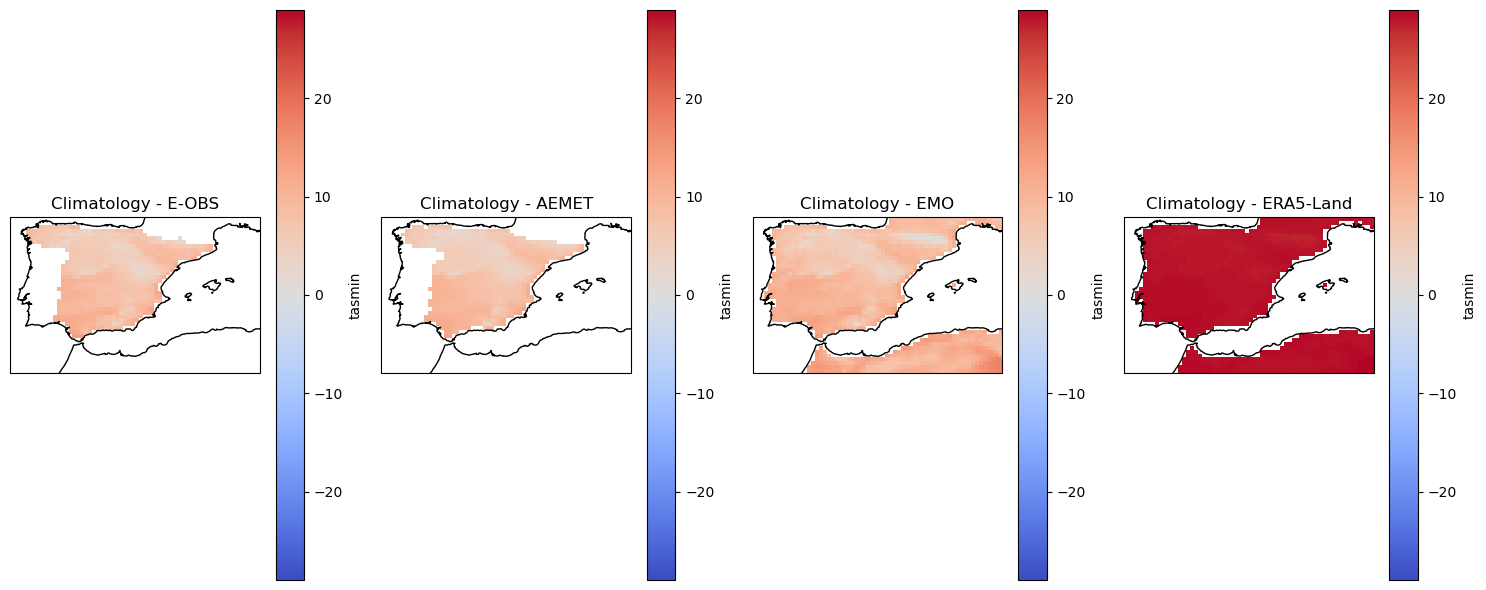

In [6]:
fig = plot_map(ds, var = variable, function = 'climatology')
fig.savefig(f"{output_dir}/map_climatogy_{variable}.pdf", bbox_inches='tight')

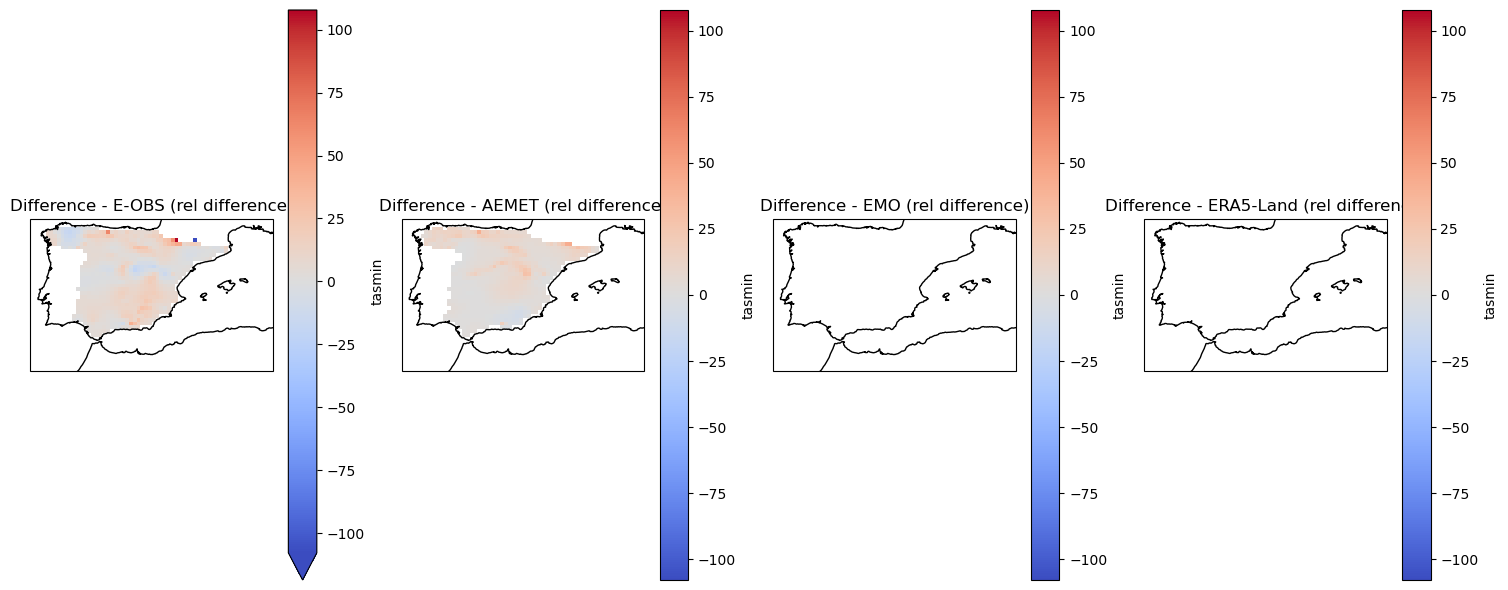

In [7]:
first_period = (pd.Timestamp("1950-01-01"), pd.Timestamp("1970-12-31"))
last_period = (pd.Timestamp("1990-01-01"), pd.Timestamp("2010-12-31"))

fig = plot_map(ds, var = variable, function = 'difference', measure = 'rel', 
                         first_period = first_period, last_period = last_period)

fig.savefig(f"{output_dir}/map_difference_relative_{variable}.pdf", bbox_inches='tight')

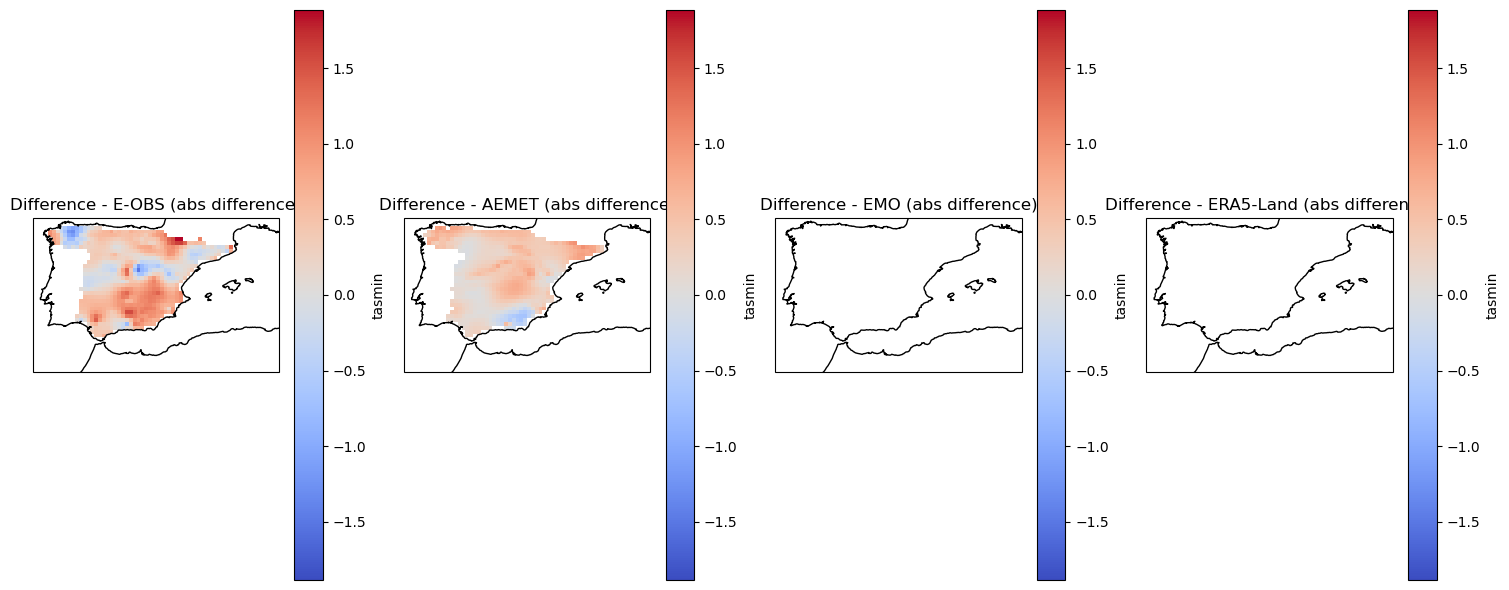

In [8]:
first_period = (pd.Timestamp("1950-01-01"), pd.Timestamp("1970-12-31"))
last_period = (pd.Timestamp("1990-01-01"), pd.Timestamp("2010-12-31"))

fig = plot_map(ds, var = variable, function = 'difference', measure = 'abs', 
                         first_period = first_period, last_period = last_period)

fig.savefig(f"{output_dir}/map_difference_absolute_{model}_{variable}.pdf", bbox_inches='tight')

### Plot the time series

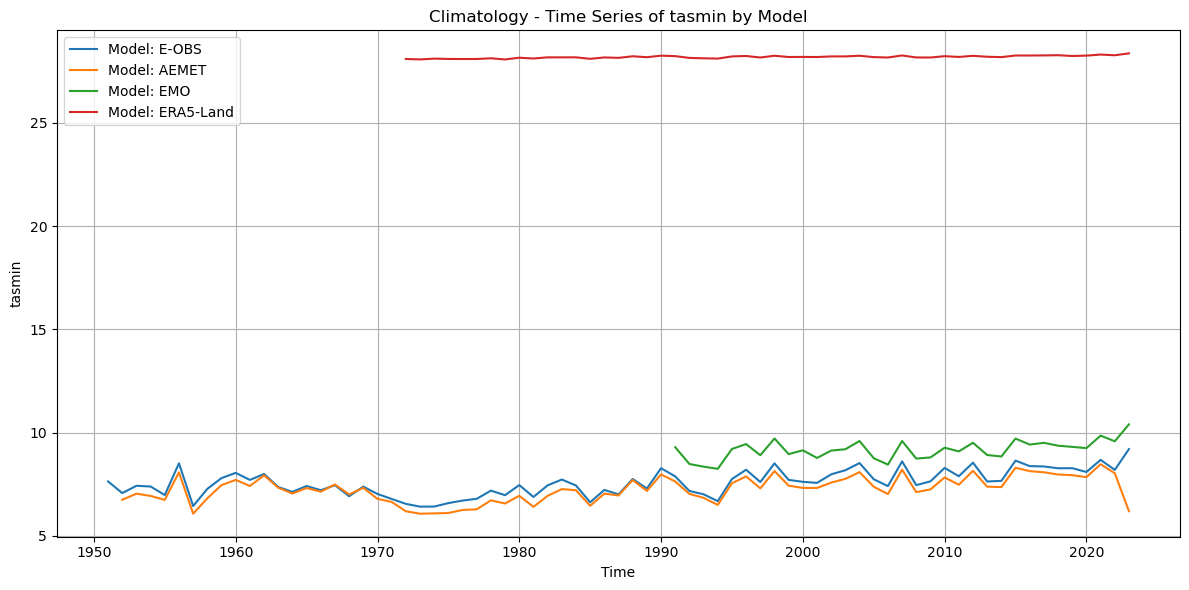

In [9]:
fig = plot_time_series(ds, var = variable, function = 'climatology')
fig.savefig(f"{output_dir}/time_series_climatogy_{variable}.pdf", bbox_inches='tight')

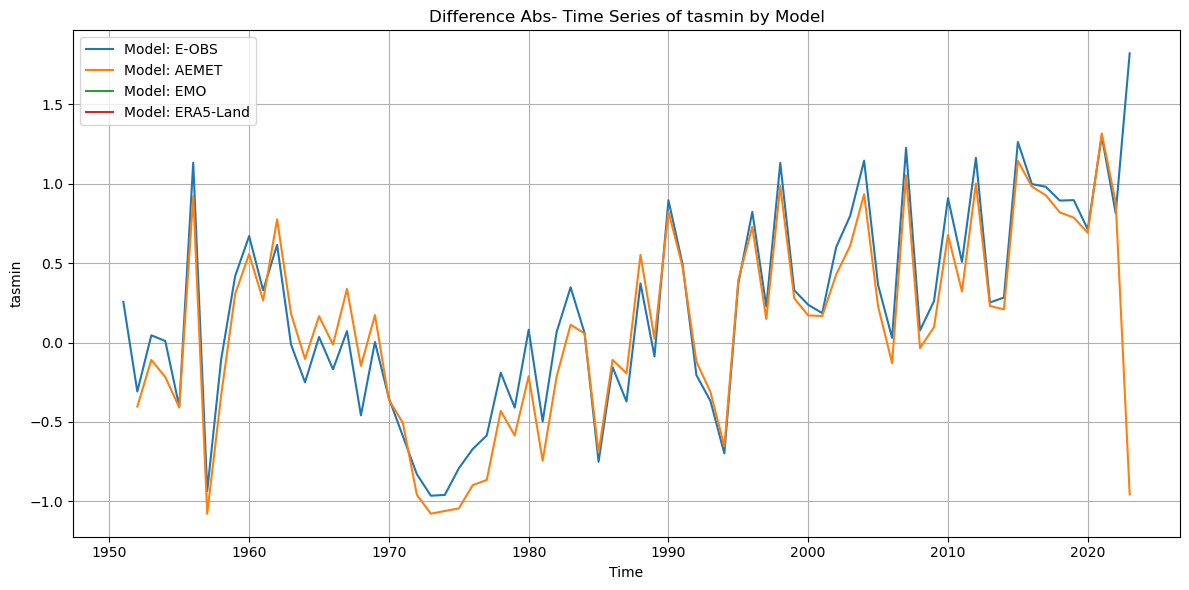

In [10]:
period = (pd.Timestamp("1950-01-01"), pd.Timestamp("1970-12-31"))

fig = plot_time_series(ds, var = variable, function = 'difference', measure = 'abs', 
                         period = period)

fig.savefig(f"{output_dir}/time_series_difference_absolute_{model}_{variable}.pdf", bbox_inches='tight')

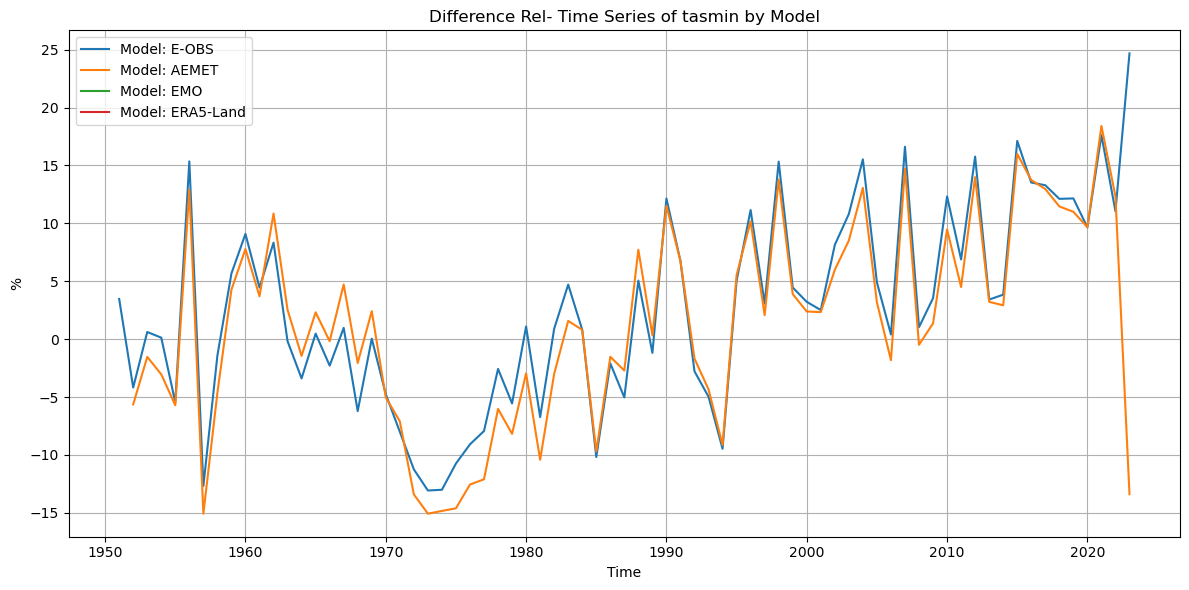

In [11]:
period = (pd.Timestamp("1950-01-01"), pd.Timestamp("1970-12-31"))

fig = plot_time_series(ds, var = variable, function = 'difference', measure = 'rel', 
                         period = period)

fig.savefig(f"{output_dir}/time_series_difference_relative_{variable}.pdf", bbox_inches='tight')

### Plot the Annual cicles

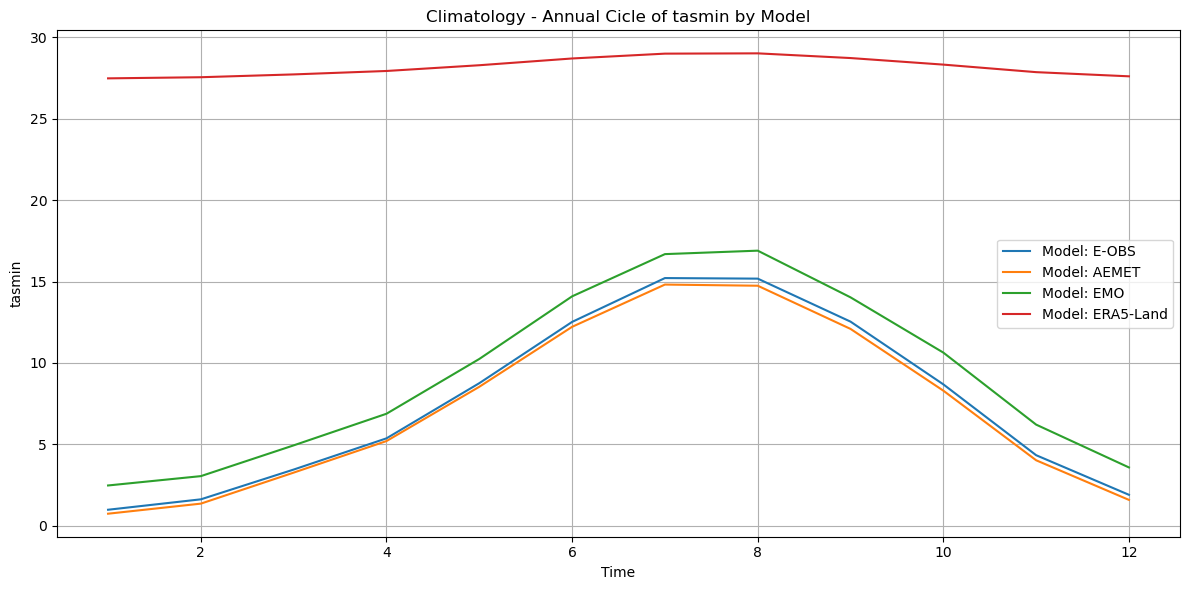

In [12]:
fig = plot_annual_cicle(ds, var = variable, function = 'climatology')
fig.savefig(f"{output_dir}/anual_cicle_climatogy_{variable}.pdf", bbox_inches='tight')

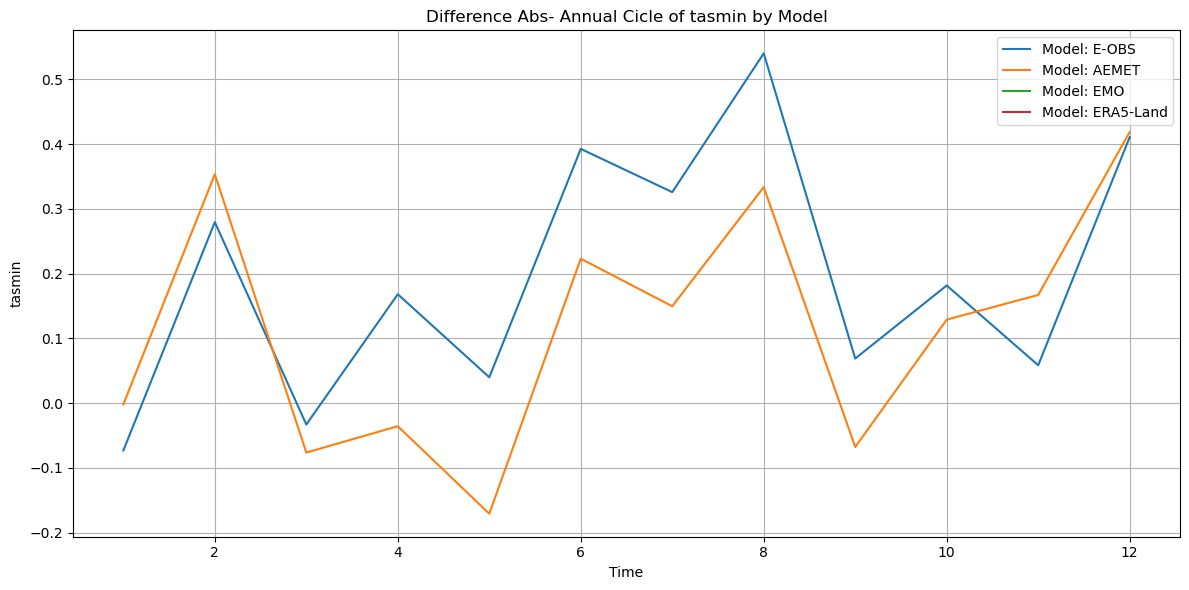

In [13]:
period = (pd.Timestamp("1950-01-01"), pd.Timestamp("1970-12-31"))

fig = plot_annual_cicle(ds, var = variable, function = 'difference', measure = 'abs', 
                         period = period)
fig.savefig(f"{output_dir}/annual_cicle_difference_absolute_{model}_{variable}.pdf", bbox_inches='tight')

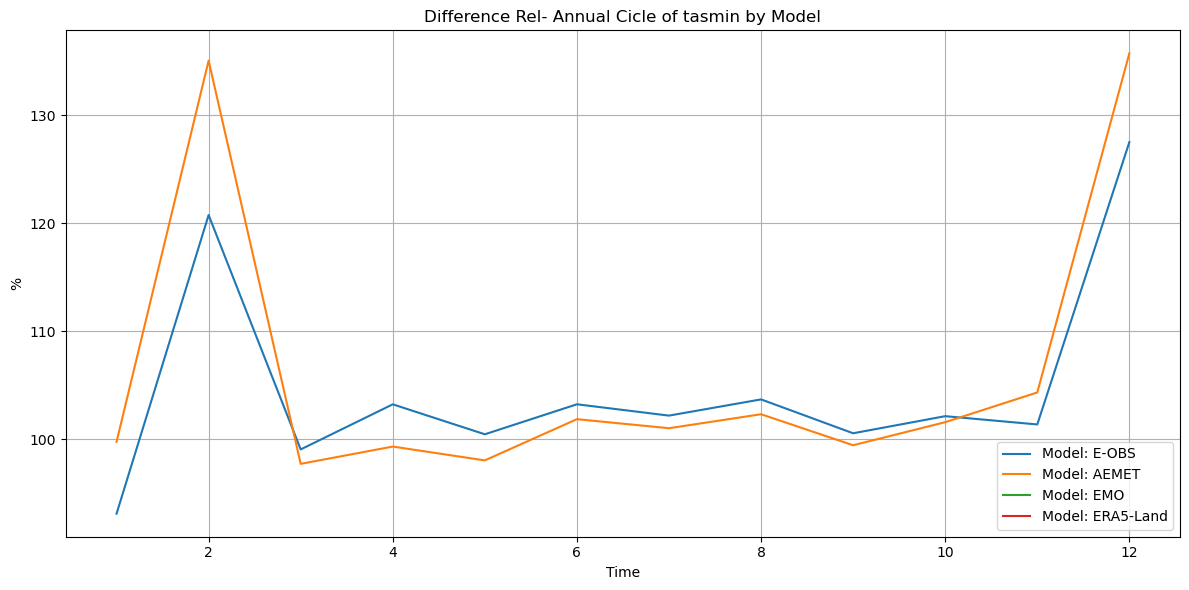

In [14]:
period = (pd.Timestamp("1950-01-01"), pd.Timestamp("1970-12-31"))

fig = plot_annual_cicle(ds, var = variable, function = 'difference', measure = 'rel', 
                         period = period)
fig.savefig(f"{output_dir}/annual_cicle_difference_rel_{model}_{variable}.pdf", bbox_inches='tight')